#**Loading and studying the properties of the Dataset**

In [71]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [72]:
crop = pd.read_csv("Crop_recommendation.csv")

In [73]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


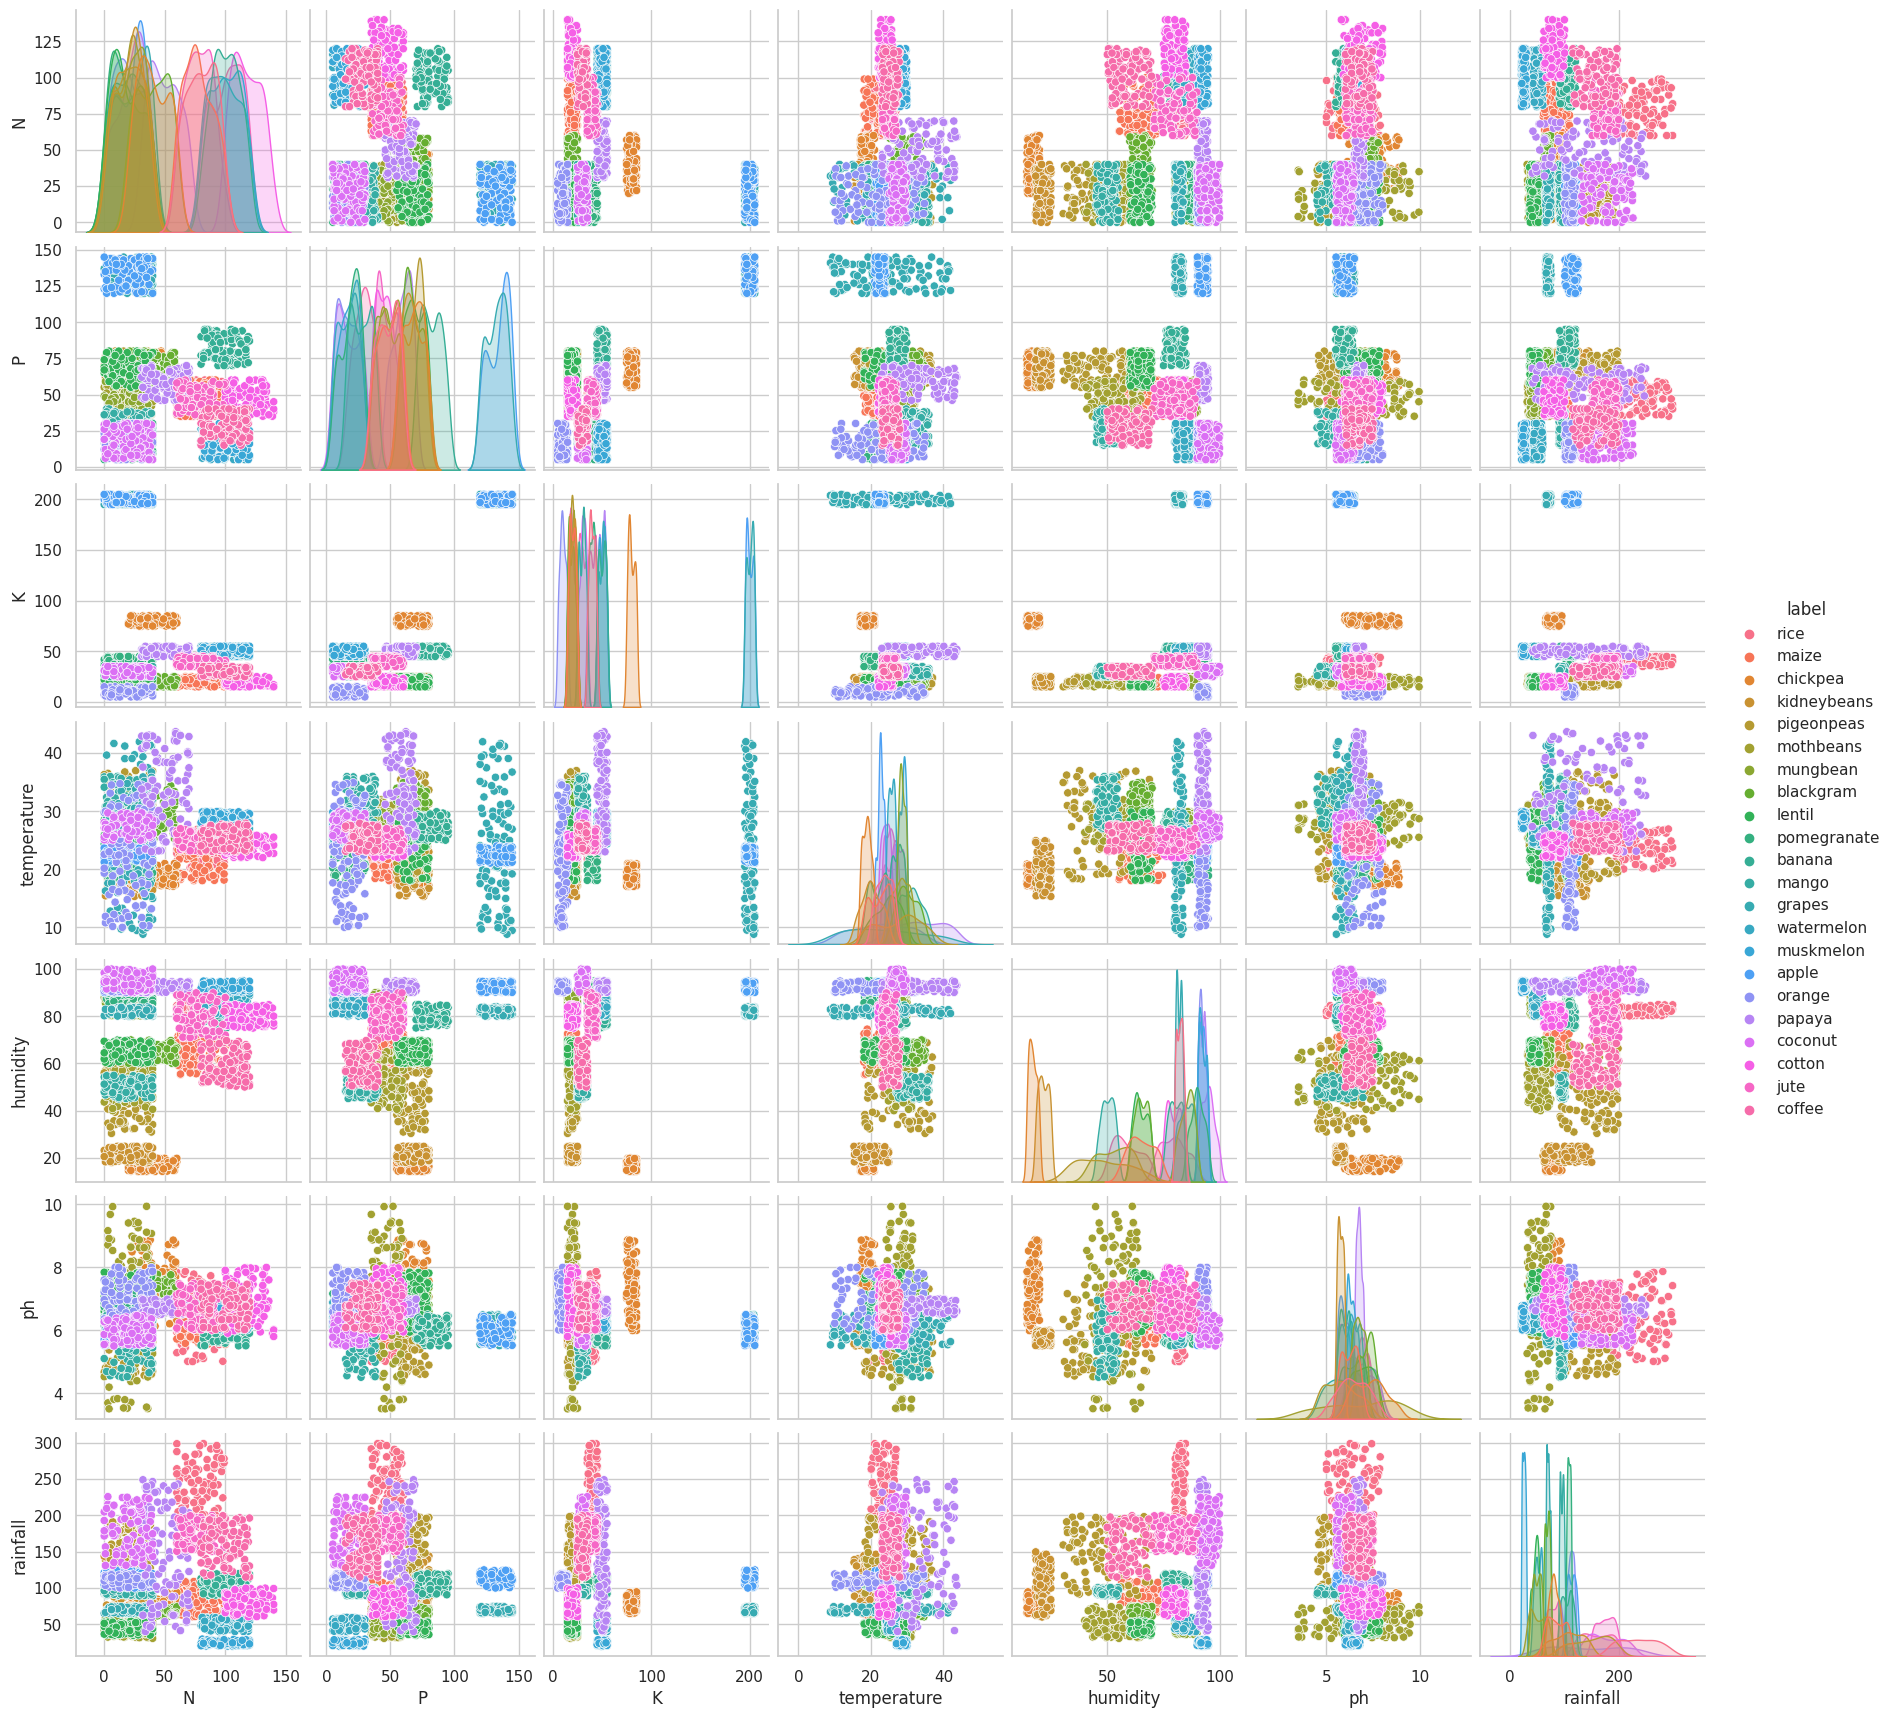

In [74]:
sns.pairplot(crop,hue = 'label')

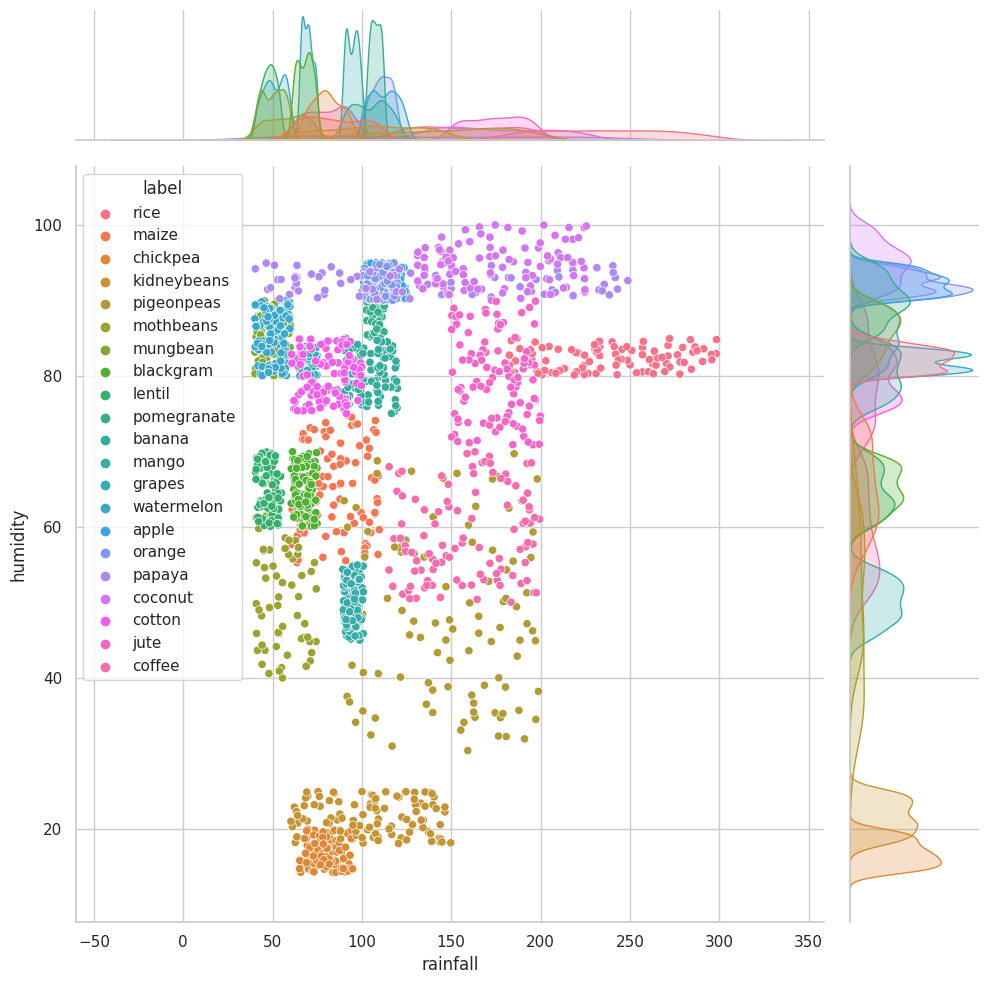

In [75]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & (crop['rainfall']>40)],height=10,hue="label")

<Axes: xlabel='label', ylabel='ph'>

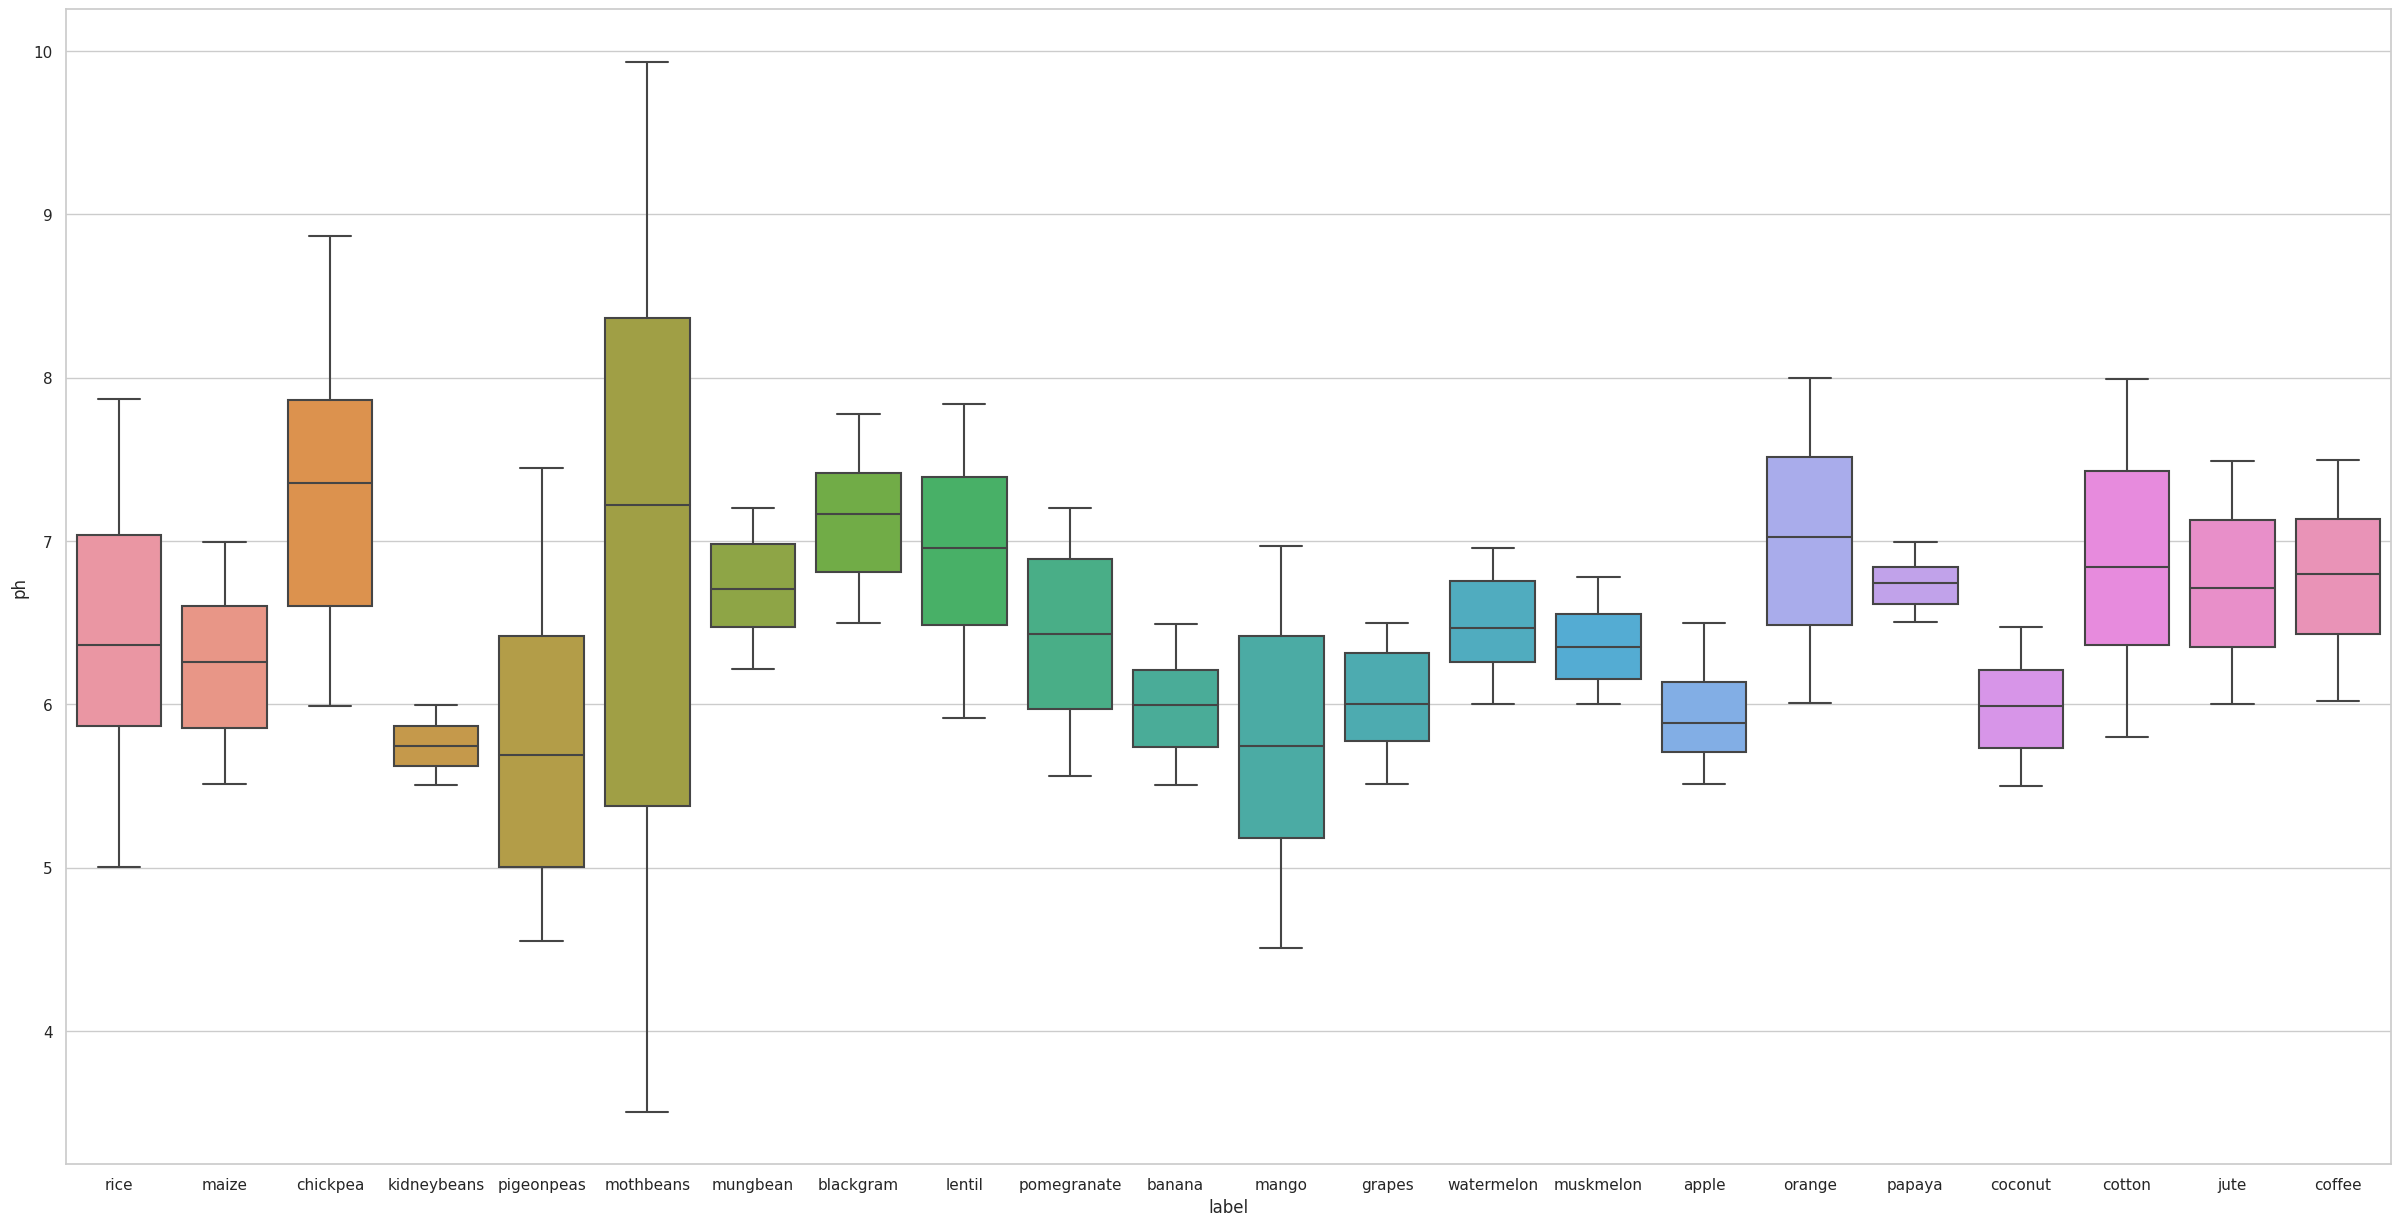

In [76]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crop)

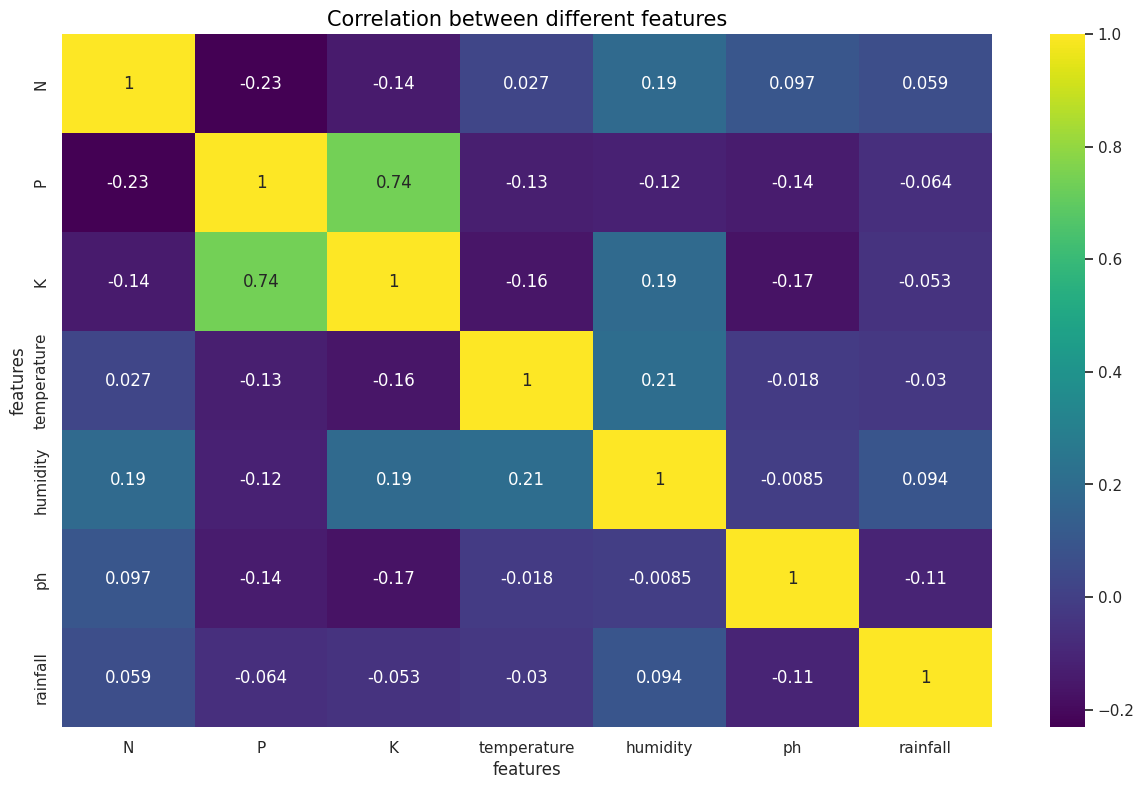

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [78]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')

In [79]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potassium',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


In [80]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [131]:
acc = []
model = []

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

#K Nearest Neighbours

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
   

In [84]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [85]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))


knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


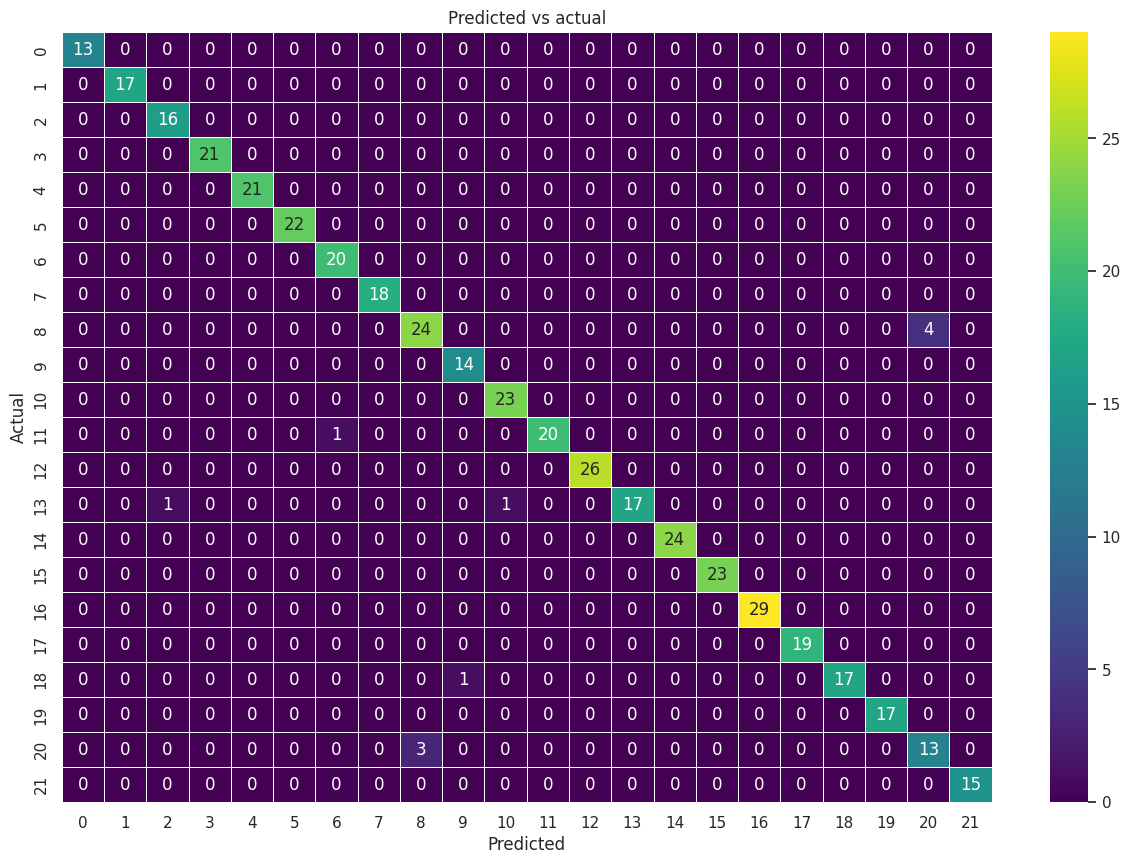

In [86]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

#**Hyperparameter tuning**

In [87]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97045455, 0.96363636, 0.97045455, 0.96363636, 0.975     ,
       0.975     , 0.97727273, 0.96818182, 0.97272727, 0.97045455,
       0.97272727, 0.96818182, 0.96818182, 0.96818182, 0.97045455,
       0.97045455, 0.97045455, 0.97272727, 0.97272727, 0.97272727])

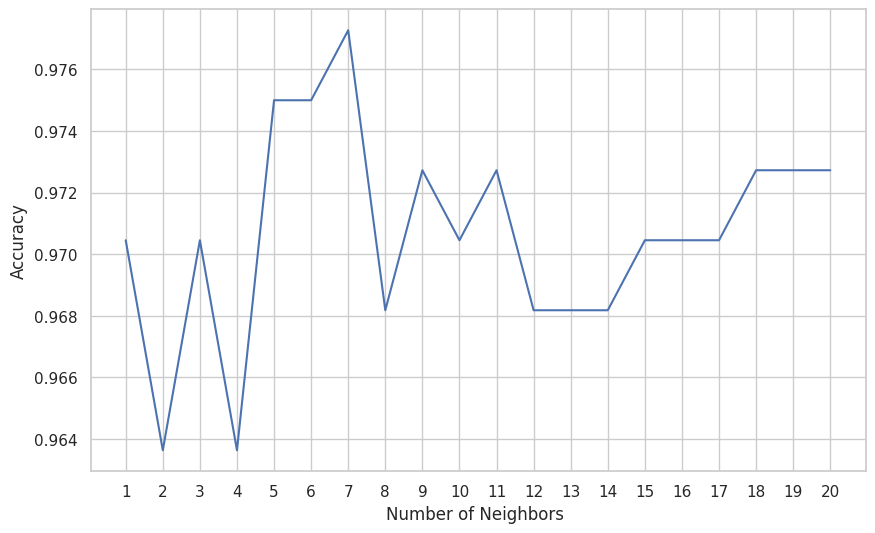

In [88]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [91]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [92]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [93]:
g_res.best_score_


0.9789756440743992

In [94]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [95]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [96]:
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9727272727272728


#**Decision** **Tree**

In [97]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')

print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [98]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [99]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


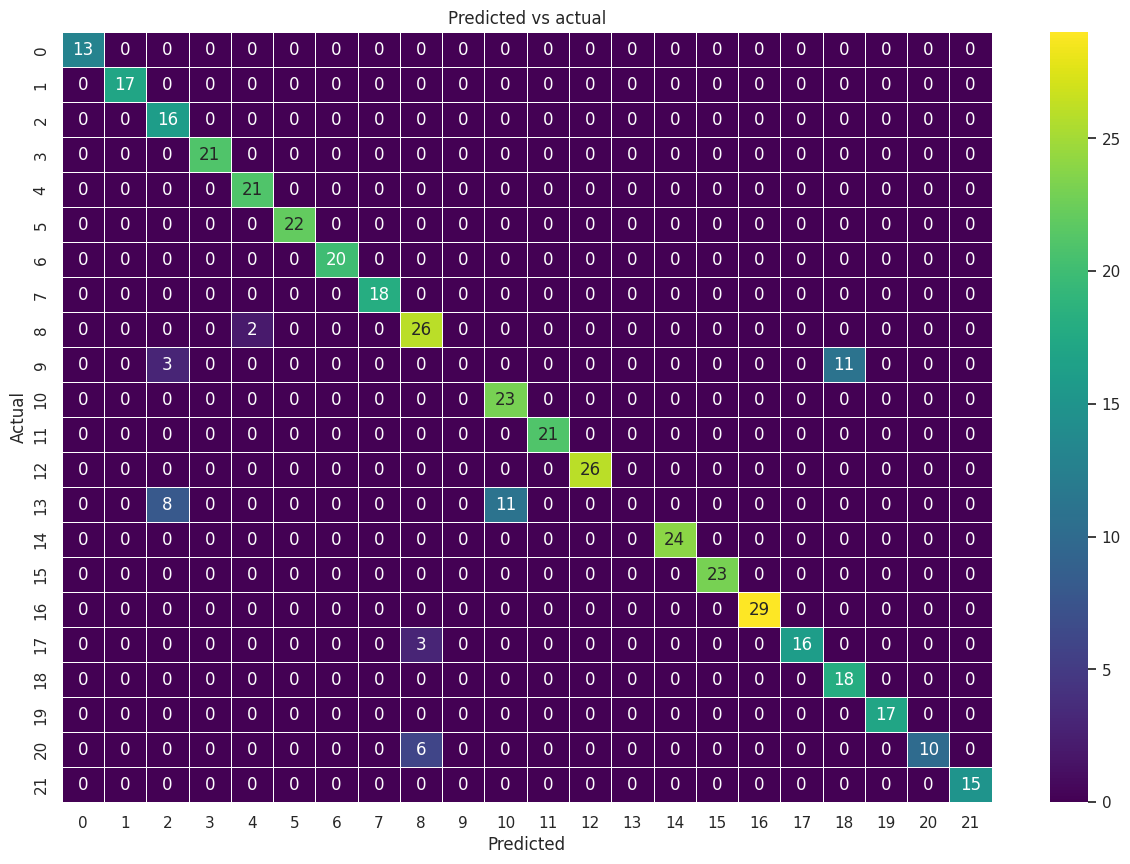

In [100]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

#Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [102]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [103]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


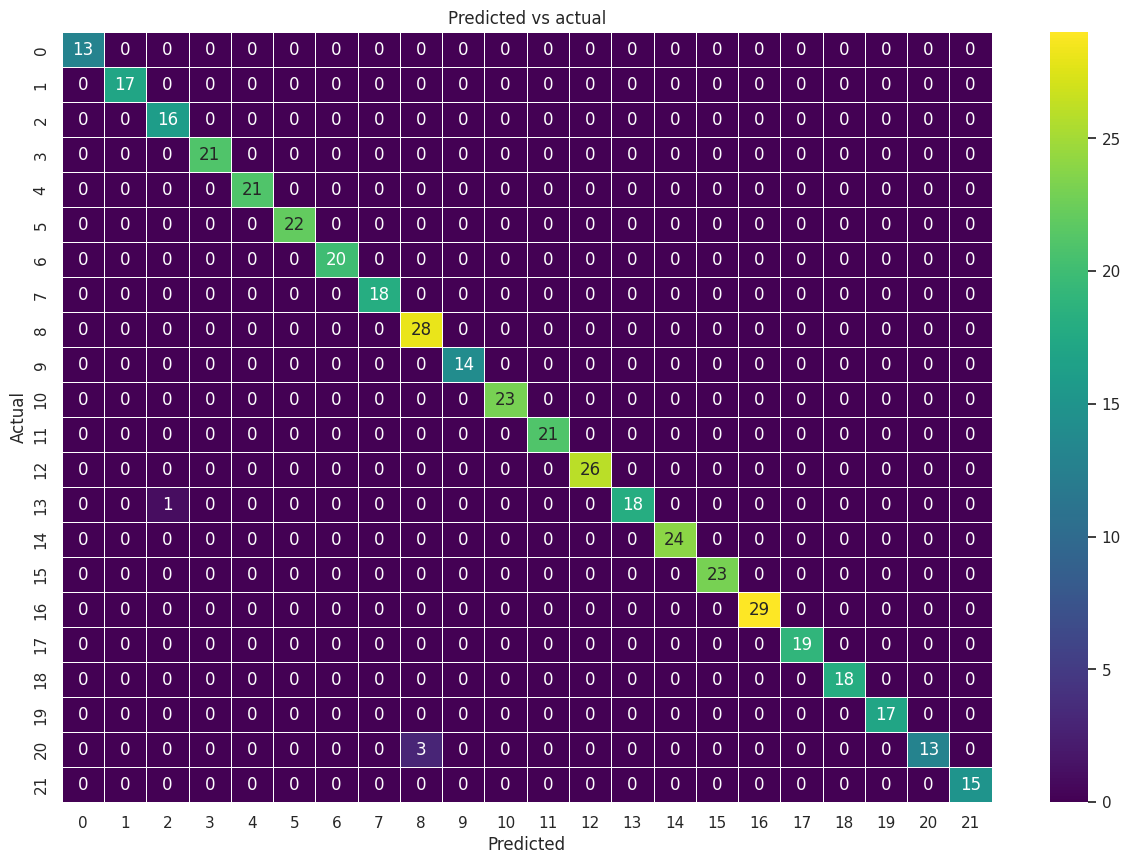

In [104]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

#Naive Bayes Classifier

In [105]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

In [106]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [107]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


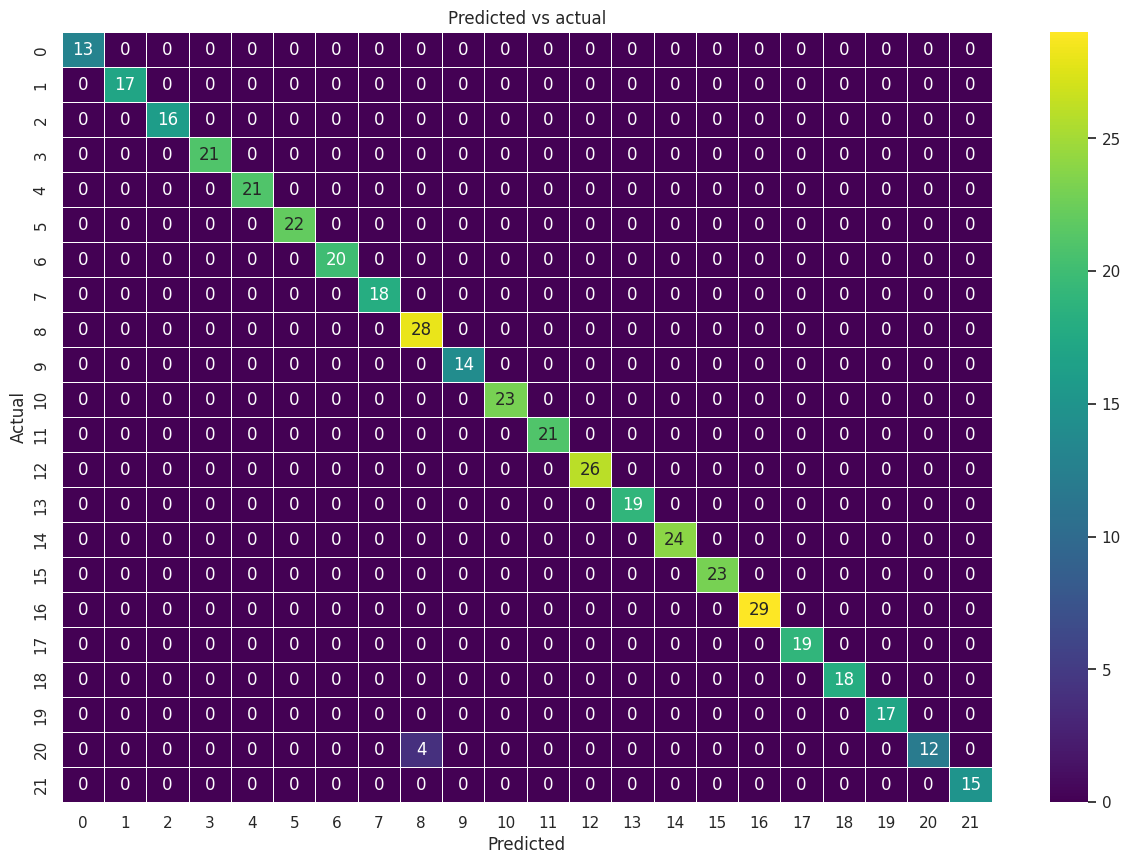

In [108]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Accuracy Comprison

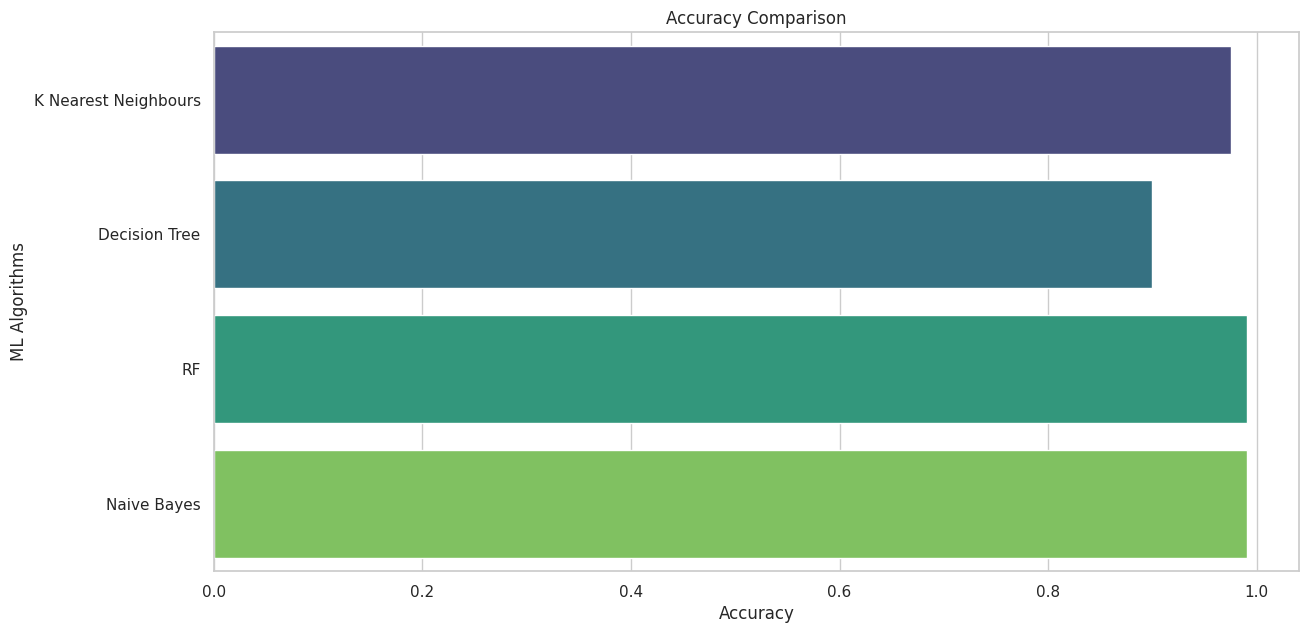

In [109]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

#Organizing the Dataset

In [135]:
labels = list(set(crop.label))
dic = {}
for l in range(len(labels)):
  dic[labels[l]] = l

crop.label = [dic[items] for items in crop.label]

train, test = train_test_split(crop, test_size=0.2)

In [114]:
dic

{'kidneybeans': 0,
 'lentil': 1,
 'maize': 2,
 'muskmelon': 3,
 'grapes': 4,
 'mungbean': 5,
 'coffee': 6,
 'apple': 7,
 'jute': 8,
 'mothbeans': 9,
 'mango': 10,
 'cotton': 11,
 'chickpea': 12,
 'pomegranate': 13,
 'pigeonpeas': 14,
 'coconut': 15,
 'blackgram': 16,
 'papaya': 17,
 'banana': 18,
 'rice': 19,
 'watermelon': 20,
 'orange': 21}

In [136]:
train_y = train.label
train_x = train.loc[:,crop.columns!='label']
test_y = test.label
test_x = test.loc[:,test.columns!='label']

#Onehot Encoding

In [137]:
train_Y =[]
for i in train_y:
    temp =[]
    for k in range(0,22):
        temp.append(0)
    temp[i]=1
    train_Y.append(temp)

test_Y =[]
for i in test_y:
    temp =[]
    for k in range(0,22):
        temp.append(0)
    temp[i]=1
    test_Y.append(temp)

#Building the Model

In [158]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

In [159]:
inputs = Input(shape=7)
X = BatchNormalization()(inputs)
X = Dense(256,activation='relu')(X)
X = BatchNormalization()(X)
X = Dense(200,activation='relu')(X)
X = BatchNormalization()(X)
X = Dense(200,activation='relu')(X)
X = Dense(50,activation='relu')(X)
output = Dense(units=22,activation='softmax')(X)
model = Model(inputs=inputs,outputs=output)

In [160]:
model.summary()
model.compile(optimizer=Adam(learning_rate=2e-3),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 7)]               0         
                                                                 
 batch_normalization_15 (Bat  (None, 7)                28        
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 256)               2048      
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 200)               51400     
                                                                 
 batch_normalization_17 (Bat  (None, 200)              800 

In [161]:
train_Y = tf.convert_to_tensor(train_Y)

#Train

In [162]:
history = model.fit(train_x,train_Y,batch_size=512,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 14ms/step - loss: 2.3611 - categorical_accuracy: 0.3830
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.9253 - categorical_accuracy: 0.8665
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3619 - categorical_accuracy: 0.9483
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1604 - categorical_accuracy: 0.9710
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0990 - categorical_accuracy: 0.9756
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0641 - categorical_accuracy: 0.9790
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0580 - categorical_accuracy: 0.9830
Epoch 8/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0379 - categorical_accuracy: 0.9886
Epoch 9/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0318 - categorical_accuracy: 0.9886
E

#Testing the trained model

In [153]:
 #scores = model.evaluate(np.array(test_x),np.array(test_y),verbose=0)

In [163]:
correct =0
for i in range(len(test_x)):
    prediction=model.predict(np.array(test_x)[i].reshape(1,7))
    result = np.argmax(prediction)
    arr = (np.array(test_y)).astype('int')
    if (arr[i]==result):
        correct = correct + 1

1/1 [==============================] - 0s 23ms/step


In [164]:
correct

435

In [125]:
N = int(input("Enter the value of N"))
P = int(input("Enter the value of P"))
K = int(input("Enter the value of K"))
temp = float(input("Enter the value of Temp "))
humidity = float(input("Enter the value of Humidity "))
ph = float(input("Enter the value of PH "))
rain = float(input("Enter the value of Rainfall "))
X = [[N,P,K,temp,humidity,ph,rain]]
result = model.predict(np.array(X))
print(np.argmax(result))

Enter the value of N45
Enter the value of P34
Enter the value of K56
Enter the value of Temp 24
Enter the value of Humidity 67
Enter the value of PH 5
Enter the value of Rainfall 78
1/1 [==============================] - 0s 25ms/step
20


In [126]:
dic

{'kidneybeans': 0,
 'lentil': 1,
 'maize': 2,
 'muskmelon': 3,
 'grapes': 4,
 'mungbean': 5,
 'coffee': 6,
 'apple': 7,
 'jute': 8,
 'mothbeans': 9,
 'mango': 10,
 'cotton': 11,
 'chickpea': 12,
 'pomegranate': 13,
 'pigeonpeas': 14,
 'coconut': 15,
 'blackgram': 16,
 'papaya': 17,
 'banana': 18,
 'rice': 19,
 'watermelon': 20,
 'orange': 21}

#Save the trained model

In [127]:
model.save_weights("model")